In [244]:
import pandas as pd # import pandas 
import matplotlib.pyplot as plt
from pandas import DataFrame
import os 
bookings = pd.read_csv("/Users/brindamunuswamy/Desktop/MIS581/hotel_bookings.csv") # read CSV into pandas
bookings.head(15) #reading top 5 rows

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,No Deposit,NaN,NaN,0,Transient,107.00,0,0,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,No Deposit,303.0,NaN,0,Transient,103.00,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,No Deposit,240.0,NaN,0,Transient,82.00,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,No Deposit,15.0,NaN,0,Transient,105.50,0,0,Canceled,2015-04-22


In [245]:
bookings.info() # initial analysis of the dataset 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [246]:
bookings.isnull().sum() # checking for null values

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

<BarContainer object of 333 artists>

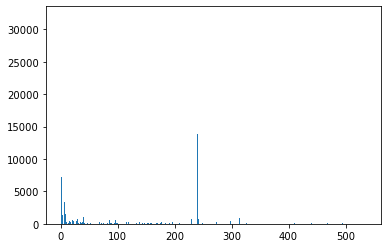

In [247]:
data = bookings['agent'].value_counts() # checking for how agent IDs are distributed in the dataset
plt.bar(data.index,data.values)

<BarContainer object of 352 artists>

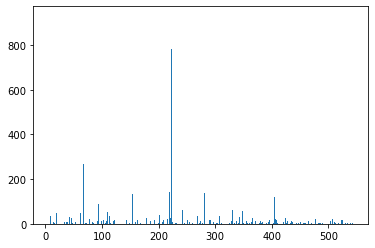

In [248]:
data = bookings['company'].value_counts() # checking how company IDs are distibuted in the data set
plt.bar(data.index,data.values)

<BarContainer object of 177 artists>

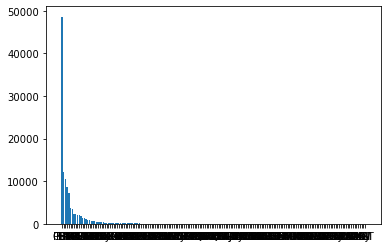

In [249]:
data = bookings['country'].value_counts() # checking how country codes are distibuted in the dataset 
plt.bar(data.index,data.values)

In [250]:
booking_1 = bookings['hotel'] == "Resort Hotel" # dataset with records of resort hotel only 
booking_h1 = bookings.loc[booking_1,:] #new df with records of resort hotel 
booking_h1.head() # reading top 5 records
booking_h1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40060 entries, 0 to 40059
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           40060 non-null  object 
 1   is_canceled                     40060 non-null  int64  
 2   lead_time                       40060 non-null  int64  
 3   arrival_date_year               40060 non-null  int64  
 4   arrival_date_month              40060 non-null  object 
 5   arrival_date_week_number        40060 non-null  int64  
 6   arrival_date_day_of_month       40060 non-null  int64  
 7   stays_in_weekend_nights         40060 non-null  int64  
 8   stays_in_week_nights            40060 non-null  int64  
 9   adults                          40060 non-null  int64  
 10  children                        40060 non-null  float64
 11  babies                          40060 non-null  int64  
 12  meal                            

In [251]:
booking_h1['deposit_type'].value_counts() # checking deposit type counts 

No Deposit    38199
Non Refund     1719
Refundable      142
Name: deposit_type, dtype: int64

In [252]:
booking_2 = bookings['hotel'] == "City Hotel" # dataset with records of city hotel 
booking_h2 = bookings.loc[booking_2,:] #new df with city hotel records
booking_h2.head() # reading top 5 records
booking_h2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79330 entries, 40060 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           79330 non-null  object 
 1   is_canceled                     79330 non-null  int64  
 2   lead_time                       79330 non-null  int64  
 3   arrival_date_year               79330 non-null  int64  
 4   arrival_date_month              79330 non-null  object 
 5   arrival_date_week_number        79330 non-null  int64  
 6   arrival_date_day_of_month       79330 non-null  int64  
 7   stays_in_weekend_nights         79330 non-null  int64  
 8   stays_in_week_nights            79330 non-null  int64  
 9   adults                          79330 non-null  int64  
 10  children                        79326 non-null  float64
 11  babies                          79330 non-null  int64  
 12  meal                       

In [253]:
h1 = booking_h1['is_canceled'].value_counts(ascending=True) # getting cancelled bookings for resort hotel
print(h1)


1    11122
0    28938
Name: is_canceled, dtype: int64


In [254]:
h2 = booking_h2['is_canceled'].value_counts(ascending=True)# getting cancelled bookings for city hotel
print(h2)


1    33102
0    46228
Name: is_canceled, dtype: int64


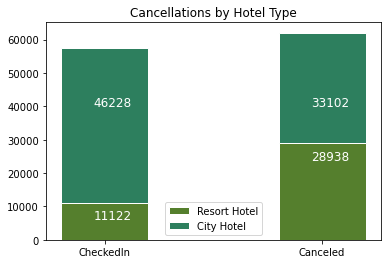

In [255]:
h1 = booking_h1['is_canceled'].value_counts(ascending=True) # plotting cancelled booking counts in city hotel versus resort hotel 
h2 = booking_h2['is_canceled'].value_counts()


p1 = plt.bar(["CheckedIn","Canceled"],h1,0.4,label="Resort Hotel", color = '#557f2d',edgecolor='white') #plot one bar chart
p2 = plt.bar(["CheckedIn","Canceled"],h2,0.4,bottom=h1,label="City Hotel",color='#2d7f5e',edgecolor='white')
# plot stacked bar chart on top of the first one
plt.legend() # plot the legend
plt.title('Cancellations by Hotel Type') # plot the title

j =0 # counter to display values in the array on the bar chart
totals = [] # empty list to capture the bar height 
for i in p1.patches: 
    totals.append(i.get_height())
    #print(totals)
for i in p1.patches: # loop to display bar height in each bar 
    plt.text(i.get_x()+.15, i.get_height()-5000, str(totals[j]), fontsize=12,color='white')
    #alignment and font of display
    j = j+1
    k =0 # counter to display values in the array on the bar chart
totals1 = [] # empty list to capture the bar height 
for l in p2.patches: 
    totals1.append(l.get_height())
    #print(totals1)
for l in p2.patches: # loop to display bar height in each bar 
    #print (k)
    if k == 1: 
        height = i.get_height()+l.get_height()-10
    else:
        
        height = l.get_height()
        #print(height)
    plt.text(l.get_x()+.15,40000, str(totals1[k]), fontsize=12,color='white')
    #alignment and font of display
    k = k+1

In [257]:
booking_3 = bookings['is_canceled'] == 0 # dataset with records of checked in booking in both resort and city hotel
booking_check = bookings.loc[booking_3,:] #new df with checked in booking records
booking_check.head() # reading top 5 records
booking_check.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75166 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           75166 non-null  object 
 1   is_canceled                     75166 non-null  int64  
 2   lead_time                       75166 non-null  int64  
 3   arrival_date_year               75166 non-null  int64  
 4   arrival_date_month              75166 non-null  object 
 5   arrival_date_week_number        75166 non-null  int64  
 6   arrival_date_day_of_month       75166 non-null  int64  
 7   stays_in_weekend_nights         75166 non-null  int64  
 8   stays_in_week_nights            75166 non-null  int64  
 9   adults                          75166 non-null  int64  
 10  children                        75166 non-null  float64
 11  babies                          75166 non-null  int64  
 12  meal                           

In [258]:
booking_4 = bookings['is_canceled'] == 1 # dataset with records of cancelled bookings in both city and resort hotel
booking_can = bookings.loc[booking_4,:] #new df with cancelled bookings
booking_can.head() # reading top 5 records
booking_can.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44224 entries, 8 to 117295
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           44224 non-null  object 
 1   is_canceled                     44224 non-null  int64  
 2   lead_time                       44224 non-null  int64  
 3   arrival_date_year               44224 non-null  int64  
 4   arrival_date_month              44224 non-null  object 
 5   arrival_date_week_number        44224 non-null  int64  
 6   arrival_date_day_of_month       44224 non-null  int64  
 7   stays_in_weekend_nights         44224 non-null  int64  
 8   stays_in_week_nights            44224 non-null  int64  
 9   adults                          44224 non-null  int64  
 10  children                        44220 non-null  float64
 11  babies                          44224 non-null  int64  
 12  meal                           

In [259]:
can_channel = booking_can['market_segment'].value_counts() # getting counts for market segments in cancelled bookings
print(can_channel)

Online TA        20739
Groups           12097
Offline TA/TO     8311
Direct            1934
Corporate          992
Complementary       97
Aviation            52
Undefined            2
Name: market_segment, dtype: int64


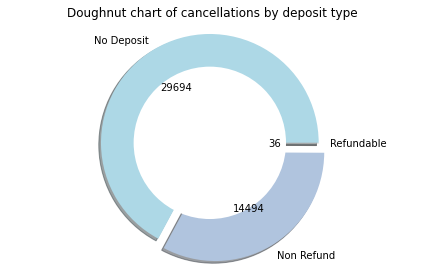

In [260]:
import numpy # plotting deposity type distribution in cancelled bookings 
can_segment = booking_can['deposit_type'].value_counts()
#print(can_segment)
name=can_segment.index.tolist()
#print(name)
def absolute_value(val): # calculating the exact values to be displayed on the pie chart by writing a custom function
    a  = numpy.round(val/100.*can_segment.sum(),0) #reverse calculating the exact count from sum 
    return int(a) #converting the float outcome into integer
my_labels = name
my_colors = ['lightblue','lightsteelblue','silver']
my_explode = (0,0.1,0)
#,'azure','thistle','lightcyan','cornsilk','red'

fig1, ax1 = plt.subplots()

ax1.pie(can_segment,labels=my_labels,autopct=absolute_value,shadow=True,colors=my_colors,explode=my_explode)

plt.title("Doughnut chart of cancellations by deposit type") #pie chart title
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

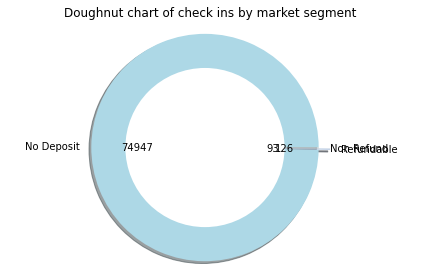

In [261]:
import numpy # plotting deposity type distribution in checked in bookings 
can_segment = booking_check['deposit_type'].value_counts()
#print(can_segment)
name=can_segment.index.tolist()
#print(name)
def absolute_value(val): # calculating the exact values to be displayed on the pie chart by writing a custom function
    a  = numpy.round(val/100.*can_segment.sum(),0) #reverse calculating the exact count from sum 
    return int(a) #converting the float outcome into integer
my_labels = name
my_colors = ['lightblue','lightsteelblue','silver']
my_explode = (0, 0.1, 0)
#'azure','thistle','lightcyan','cornsilk'

fig1, ax1 = plt.subplots()

ax1.pie(can_segment,labels=my_labels,autopct=absolute_value,shadow=True,colors=my_colors,explode=my_explode)

plt.title("Doughnut chart of check ins by market segment") #pie chart title
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

Online TA        35738
Offline TA/TO    15908
Direct           10672
Groups            7714
Corporate         4303
Complementary      646
Aviation           185
Name: market_segment, dtype: int64


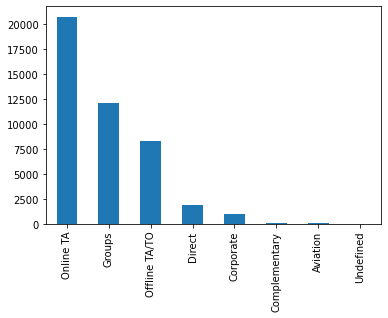

In [235]:
can_segment = booking_can['market_segment'].value_counts() # plotting market segment for cancelled bookings 
print(check_segment)
plt.title('')
can_segment.plot(kind='bar')

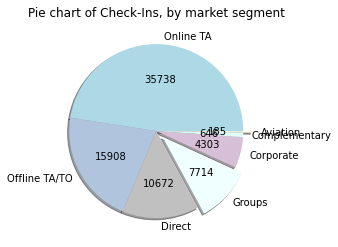

In [204]:
check_segment = booking_check['market_segment'].value_counts()

name=check_segment.index.tolist()
#print(name)
def absolute_value(val): # calculating the exact values to be displayed on the pie chart by writing a custom function
    a  = numpy.round(val/100.*check_segment.sum(),0) #reverse calculating the exact count from sum 
    return int(a) #converting the float outcome into integer
my_labels = name
my_colors = ['lightblue','lightsteelblue','silver','azure','thistle','lightcyan','cornsilk']
my_explode = (0, 0, 0,0.1,0,0,0.1)
plt.title('Pie chart of Check-Ins, by market segment') #pie chart title
plt.pie(check_segment,labels=my_labels,autopct=absolute_value,shadow=True,colors=my_colors,explode=my_explode) #plotting the pie chart based on the value count panda series
plt.show()


In [205]:
can_deposit = booking_can['deposit_type'].value_counts()
print(can_deposit)

No Deposit    29694
Non Refund    14494
Refundable       36
Name: deposit_type, dtype: int64


In [206]:
booking_5 = booking_h1['is_canceled'] == 0 # dataset with records of non-survivors
booking_h1_check = booking_h1.loc[booking_5,:] #new df with non-survivor records

booking_6 = booking_h1['is_canceled'] == 1 # dataset with records of non-survivors
booking_h1_can = booking_h1.loc[booking_6,:] #new df with non-survivor records

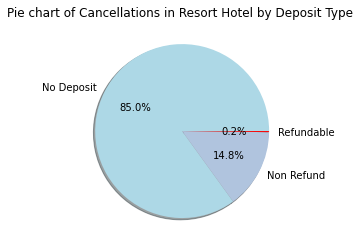

In [207]:
h1_can_deposit = booking_h1_can['deposit_type'].value_counts()
#print(h1_can_deposit)

name=h1_can_deposit.index.tolist()
#print(name)
def absolute_value(val): # calculating the exact values to be displayed on the pie chart by writing a custom function
    a  = numpy.round(val/100.*h1_can_deposit.sum(),0) #reverse calculating the exact count from sum 
    return int(a) #converting the float outcome into integer
my_labels = name
my_colors = ['lightblue','lightsteelblue','red']
my_explode = (0,0,0)
plt.title('Pie chart of Cancellations in Resort Hotel by Deposit Type ') #pie chart title
plt.pie(h1_can_deposit,labels=my_labels,autopct="%.1f%%",shadow=True,colors=my_colors,explode=my_explode) #plotting the pie chart based on the value count panda series
plt.show()


In [216]:


booking_h1_can['arrival_date_year'].value_counts()
#ame=h1_can_year.index.tolist()

#lt.plot(h1_can_year)
#plt.title('title name')
#plt.xlabel('xAxis name')
#plt.show()

2016    4930
2017    4054
2015    2138
Name: arrival_date_year, dtype: int64

In [217]:
h1_check_deposit = booking_h1_check['deposit_type'].value_counts()
print(h1_check_deposit)

No Deposit    28749
Refundable      120
Non Refund       69
Name: deposit_type, dtype: int64


In [218]:
booking_6 = booking_h2['is_canceled'] == 0 # dataset with records of non-survivors
booking_h2_check = booking_h2.loc[booking_6,:] #new df with non-survivor records

booking_7 = booking_h2['is_canceled'] == 1 # dataset with records of non-survivors
booking_h2_can = booking_h2.loc[booking_7,:] #new df with non-survivor records

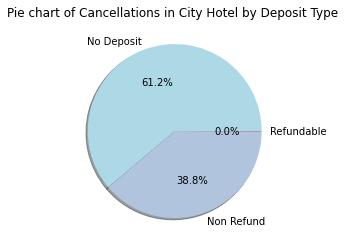

In [219]:
h2_can_deposit = booking_h2_can['deposit_type'].value_counts()
#print(h2_can_deposit)

name=h2_can_deposit.index.tolist()
#print(name)
def absolute_value(val): # calculating the exact values to be displayed on the pie chart by writing a custom function
    a  = numpy.round(val/100.*h2_can_deposit.sum(),0) #reverse calculating the exact count from sum 
    return int(a) #converting the float outcome into integer
my_labels = name
my_colors = ['lightblue','lightsteelblue','red']
my_explode = (0,0,0)
plt.title('Pie chart of Cancellations in City Hotel by Deposit Type ') #pie chart title
plt.pie(h2_can_deposit,labels=my_labels,autopct="%.1f%%",shadow=True,colors=my_colors,explode=my_explode) #plotting the pie chart based on the value count panda series
plt.show()

In [226]:
booking_h2_can['arrival_date_year'].value_counts()

2016    15407
2017    11691
2015     6004
Name: arrival_date_year, dtype: int64

In [227]:
booking_h2_check['arrival_date_year'].value_counts()

2016    22733
2017    15817
2015     7678
Name: arrival_date_year, dtype: int64

In [75]:
h2_check_deposit = booking_h2_check['deposit_type'].value_counts()
print(h2_check_deposit)

No Deposit    46198
Non Refund       24
Refundable        6
Name: deposit_type, dtype: int64


Online TA        11481
Offline TA/TO     6334
Direct            5635
Groups            3362
Corporate         1958
Complementary      168
Name: market_segment, dtype: int64


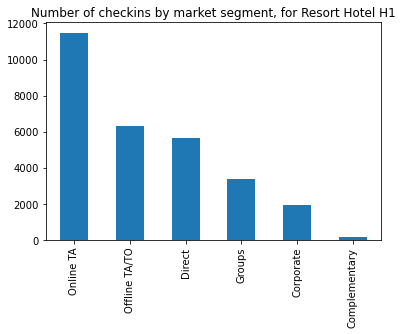

In [242]:
h1can_segment = booking_h1_check['market_segment'].value_counts()
print(h1can_segment)
plt.title('Number of checkins by market segment, for Resort Hotel H1')
h1can_segment.plot(kind='bar')

Online TA        24257
Offline TA/TO     9574
Direct            5037
Groups            4352
Corporate         2345
Complementary      478
Aviation           185
Name: market_segment, dtype: int64


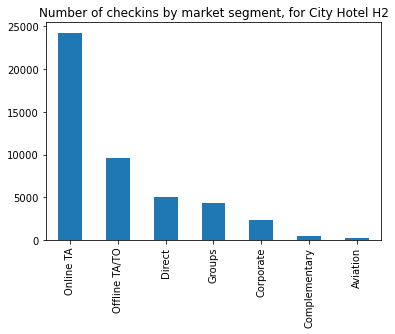

In [243]:
h2can_segment = booking_h2_check['market_segment'].value_counts()
print(h2can_segment)
plt.title('Number of checkins by market segment, for City Hotel H2')
h2can_segment.plot(kind='bar')